# NLP Framework의 활용

최근 NLP 분야에선 transformer 기반의 BERT 등 다양한 pretrained model이 발표되고, 이를 활용한 전이학습(transfer learning)을 통해 다양한 NLP 태스크를 손쉽게 구현하는 흐름이 두드러지고 있습니다.

정말 다양한 framework들이 존재하고 있습니다. 

어떤 멋진 NLP framework들이 있는지 간단히 살펴보겠지만, 이번 시간에 우리는 특히 Huggingface(🤗)의 transformers를 중심으로 다양한 NLP의 모델들을 다루는 방법에 대해 이야기 나눠볼까 합니다.

## 다양한 NLP Framework의 출현

Huggingface transformers이전에도 NLP 분야에 널리 알려진 framework들이 많이 있었습니다.  
지금도 널리 활용되고 있는 것들 위주로 종류별로 몇 가지를 살펴보도록 하겠습니다

### General Framework for NLP

NLP 문제를 가장 일반적으로 해결할 수 있는 통합적인 프레임워크를 목표로 설계된 것들

대표적으로는 AllenNLP, Fairseq, Fast.ai가 있으며, Google의 tensor2tensor 프로젝트도 같은 범주로 생각할 수 있습니다.

- AllenNLP
  - 제공자 : Allen AI Institute
  - Website : https://allennlp.org/
  - Github : https://github.com/allenai/allennlp
  - Backend : PyTorch
- Fairseq
  - 제공자 : Facebook AI Research
  - Website : https://fairseq.readthedocs.io/en/latest
  - Github : https://github.com/pytorch/fairseq
  - Backend : PyTorch
- Fast.ai
  - 제공자 : fast.ai
  - Website : http://docs.fast.ai/
  - Github : https://github.com/fastai/fastai
  - Backend : PyTorch
- tensor2tensor
  - 제공자 : Google Brain
  - Google Brain에서 2017년에 transformer 논문을 발표하면서 그 구현체로 함께 공유했던 프로젝트가 바로 tensor2tensor였습니다.
  - Github : https://github.com/tensorflow/tensor2tensor (deprecated)
  - New Github : https://github.com/google/trax
  - Backend : Tensorflow
  - 2020년도부터는 tensor2tensor의 개발을 중단하고 관련 기능을 trax로 통합이관하였습니다.

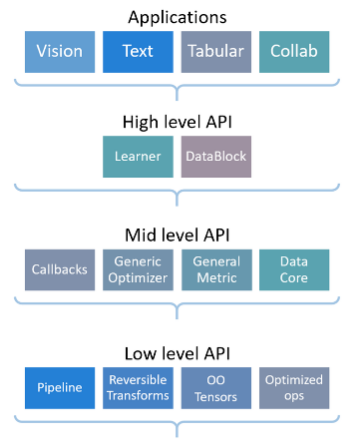

In [2]:
from IPython.display import Image
Image(filename='capture/22_fast.ai.png') 

### Preprocessing Libraries

아래는 전통적으로 사용되었던 NLP 분야의 전처리 관련 framework들입니다. 

tokenization, tagging, parsing 등 특정 전처리 작업을 위해 설계된 라이브러리에 가깝습니다. 

- Spacy
  - Website : https://spacy.io/
  - Github : https://github.com/explosion/spaCy
- NLTK
  - Website : https://www.nltk.org/
  - Github : https://github.com/nltk/nltk
- TorchText
  - Website : https://torchtext.readthedocs.io/en/latest/
  - Github : https://github.com/pytorch/text
- KoNLPy
  - Website : https://konlpy.org/en/latest/
  - Github : https://github.com/konlpy/konlpy

### Transformer-based Framework

- Huggingface transformers
  - 제공자 : Huggingface.co
  - Website : https://huggingface.co/transformers/
  - Github : https://github.com/huggingface/transformers
  - Backend : PyTorch and Tensorflow

여기에는 현재 가장 주목받고 있는 NLP Framework인 Huggingface transformers가 있습니다. 

사실 Huggingface의 transformers 라이브러리의 최근 모습은 이미 아주 general한 NLP framework의 모습을 충분히 가지고 있습니다. 하지만 초기에는 BERT 등 다양한 transformer 기반의 pretrained model을 사용하기 위한 PyTorch 기반의 wrapper 형태로 시작되었습니다. 그래서 전통적인 모델까지 포괄하려고 했던 이전의 general NLP Framework 들에 비해, Huggingface의 transformers는 pretrained model 활용을 주로 지원하며, tokenizer 등 전처리 부분도 pretrained model들이 주로 사용하는 Subword tokenizer 기법에 집중되어 있는 특징이 있습니다.

이후 다음 스텝부터는 Huggingface의 transformers에 대해 집중적으로 살펴보겠습니다.

## Huggingface transformers 개요

### Why Huggingface?

- (1) 광범위하고 신속한 NLP 모델 지원
  - Huggingface는 많은 사람들이 최신 NLP 모델들을 더욱 손쉽게 사용하는 것을 목표로 만들기 시작했다고 합니다.
  - 그래서 그런지 새로운 논문들이 발표될 때마다, 본인들의 framework에 흡수시키고 있습니다. 
  - 또한, pretrained model을 제공하고, dataset과 tokenizer를 더욱 쉽게 이용할 수 있도록 framework화시키고 있는 행보도 보이고 있습니다. 
  - 다른 framework들도 이런 작업을 하지 않는 것은 아니지만, Huggingface의 지원 범위가 가장 광범위하고, 최신 논문을 지원하는 속도도 빠릅니다.

- (2) PyTorch와 Tensorflow 모두에서 사용 가능
  - transformers는 기본적으로 PyTorch를 기반으로 만들어져있습니다. 
  - 많은 utility가 PyTorch 위주로 작성이 되어있긴 하지만, 최근에는 Tensorflow로도 학습하고 사용할 수 있게끔 계속해서 framework를 확장하고 있는 중입니다. 
  - 이렇듯 Huggingface transformers를 바탕으로 Tensorflow와 PyTorch라는 Backend의 한계를 뛰어넘어 어떤 환경에든 쉽게 적용 가능한 표준 framework의 지위를 다져가고 있습니다.

- (3) 잘 설계된 framework 구조
  - HuggingFace의 목표처럼 이 framework는 쉽고 빠르게 어떠한 환경에서도 NLP모델을 사용할 수 있도록 끊임없이 변화하고 있습니다. 
  - 이것은 또한 사용하기 쉽고 직관적일뿐더러 모델이나 태스크, 데이터셋이 달라지더라도 동일한 형태로 사용 가능하도록 잘 추상화되고 모듈화된 API 설계가 있기 때문에 가능한 것입니다.

In [3]:
!pip install transformers

In [4]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis', framework='tf')
classifier('We are very happy to include pipeline into the transformers repository.')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ziipp\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9978194236755371}]

### Huggingface transformers 설계구조 개요

framework를 사용하기 위해서는 framework가 어떻게 생겼는지 그 구조를 파악하는 것이 필요하겠죠??

NLP framework가 NLP모델을 통해 어떠한 문제를 푸는 과정이 어떻게 진행될지 생각해 봅시다.

먼저,  
1) Task를 정의하고 그에 맞게 dataset을 가공시킵니다. 그 이후  
2) 적당한 model을 선택하고 이를 만듭니다.  
3) model에 데이터들을 태워서 학습을 시키고, 이를 통해 나온  
4) weight와 설정(config)들을 저장합니다. 저장한 model의 checkpoint는  
5) 배포하거나, evaluation을 할 때 사용하고는 하죠.

transformers는 위와 같은 흐름에 맞추어 설계되어 있습니다.

- task를 정의하고 dataset을 알맞게 가공하는 Processors, 
- 텍스트 데이터를 전처리할 수 있는 Tokenizer, 
- 다양한 model을 정의한 Model, 
- optimizer와 학습 schedule(warm up 등)을 관리할 수 있는 Optimization, 
- 학습 과정을 전반을 관리하는 Trainer, 
- weight와 tokenizer, model을 쉽게 불러올 수 있도록 각종 설정을 저장하는 Config 

등으로 이루어져 있습니다.



## Huggingface transformers (1) Model

transformers의 가장 핵심적인 부분은 아무래도 모델이라고 할 수 있을 것입니다.

기본적으로 모델들은 PretrainedModel 클래스를 상속받고 있습니다. 

`PretrainedModel` 클래스는 
- 학습된 모델을 불러오고, 다운로드하고, 저장하는 등 모델 전반에 걸쳐 적용되는 메소드들을 가지고 있습니다.

모델은 두 가지 방식으로 불러올 수 있습니다.
- 1) 첫 번째로는 task에 적합한 모델을 직접 선택하여 import하고, 불러오는 방식이 있습니다.
  - 모델을 로드할 때는 from_pretrained라는 메소드를 사용하며, Huggingface의 pretrained 모델을 불러올 수도, 직접 학습시킨 모델을 불러올 수도 있습니다.
  - Huggingface에서 제공하는 pretrained 모델이라면 모델의 이름을 string으로, 
  - 직접 학습시킨 모델이라면 config와 모델을 저장한 경로를 string으로 넘겨주면 됩니다.

In [6]:
from transformers import TFBertForPreTraining
model = TFBertForPreTraining.from_pretrained('bert-base-cased')

print(model.__class__)

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


<class 'transformers.models.bert.modeling_tf_bert.TFBertForPreTraining'>


- 2) 두 번째 방법은, AutoModel을 이용하는 것입니다.
  - 모델에 관한 정보를 처음부터 명시하지 않아도 되어 조금 유용하게 사용하실 수 있습니다.

In [7]:
from transformers import TFAutoModel
model = TFAutoModel.from_pretrained("bert-base-cased")

print(model.__class__)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<class 'transformers.models.bert.modeling_tf_bert.TFBertModel'>


지원되는 모델은 아래 링크에서 확인할 수 있다.  
https://huggingface.co/transformers/pretrained_models.html

## Huggingface transformers (2) Tokenizer

내가 가지고 있는 문제를 풀 모델을 정했다면, 이제 모델에 넣을 input을 만들어 줄 차례입니다.

transformers는 다양한 tokenizer를 각 모델에 맞추어 이미 구비해두었습니다. 우리가 할 일은 tokenizer를 불러와 사용하는 것뿐이랍니다. 사용하기에 앞서서, 내가 선택한 model이 어떠한 tokenizer를 사용하는지 정도 미리 체크해두는 센스는 모두 챙겨두셨겠죠?:)

Pretrained model 기반의 NLP framework를 사용할 때 가장 중요한 두 가지 클래스는 Model과 Tokenizer라고 할 수 있습니다. 그리고 두 가지는 밀접한 관련이 있습니다. 

파라미터 구조가 동일한 Model이라 하더라도 Tokenizer가 다르거나 Tokenizer 내의 Dictionary가 달라지면 사실상 완전히 다른 모델이 됩니다. 그리고 Tokenizer는 어떤 언어를 다루느냐 하는 코퍼스 데이터셋에 따라서도 달라집니다.

이전 스텝에서 소개했던 Huggingface가 제공하는 모델 종류 중 몇 개만 예로 들어볼까요?

- bert-base-uncased
  - BERT 모델인데, 108MB 파라미터의 기본 모델이면서, 코퍼스는 영문 대소문자 구분을 없앴다(전체 소문자화)
- bert-large-cased
  - BERT 모델인데, 340MB 파라미터의 대형 모델이면서, 코퍼스는 영문 대소문자 구분을 유지했다.
- bert-base-multilingual-cased
  - BERT 모델인데, 108MB 파라미터의 기본 모델이면서, 코퍼스는 다국어 대소문자 구분 유지했다.

tokenizer 또한 직접 명시하여 내가 사용할 것을 지정해 주거나, AutoTokenizer를 사용하여 이미 구비된 model에 알맞은 tokenizer를 자동으로 불러올 수도 있습니다.
이때 유의할 점은, model을 사용할 때 명시했던 것과 동일한 ID로 tokenizer를 생성해야 한다는 점입니다.

In [8]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [9]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

불러온 tokenizer 를 한 번 사용해볼까요?

In [10]:
encoded = tokenizer("This is Test for aiffel")
print(encoded)

{'input_ids': [101, 1188, 1110, 5960, 1111, 170, 11093, 1883, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


이 경우는 BERT의 tokenizer이기 때문에 인코딩이 된 input_ids 뿐만 아니라, token_type_ids와 attention_mask까지 모두 생성된 input 객체를 받아볼 수 있습니다.

batch 단위로 input 을 받을 수도 있습니다.

In [11]:
batch_sentences = ["Hello I'm a single sentence",
                    "And another sentence",
                    "And the very very last one"]

encoded_batch = tokenizer(batch_sentences)
print(encoded_batch)

{'input_ids': [[101, 8667, 146, 112, 182, 170, 1423, 5650, 102], [101, 1262, 1330, 5650, 102], [101, 1262, 1103, 1304, 1304, 1314, 1141, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}


이 밖에도 tokenize할 때에 padding, truncation 등 다양한 옵션을 설정할 수 있으며, 모델이 어떤 프레임워크를 사용하는가(Tensorflow 또는 PyTorch)에 따라 input 타입을 변경 시켜주는 return_tensors 인자도 있습니다.

In [12]:
batch = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="tf")
print(batch)

{'input_ids': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[ 101, 8667,  146,  112,  182,  170, 1423, 5650,  102],
       [ 101, 1262, 1330, 5650,  102,    0,    0,    0,    0],
       [ 101, 1262, 1103, 1304, 1304, 1314, 1141,  102,    0]])>, 'token_type_ids': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0]])>}


## Huggingface transformers (3) Processor

과연 Tokenizer까지만 있으면 어떤 Task이든 Model에 넣을 수 있는 적절한 입력 형태로 변경해 줄 수 있을까요?

그렇지 않습니다. 예를 들어 BERT의 pretraining만 하더라도, 모델에 들어갈 입력 부분을 구성하려면

- 1) 두 개의 문장을 골라서, Next Sentence Prediction을 위해 적절히 배치하고,
- 2) 15%의 마스킹 포지션을 골라내기 위한 복잡한 과정을 거친 후, 심지어 그 마킹 대상도 10%, 10%의 확률로 마스킹 대신 다른 예외 처리를 해주어야 하고,
- 3) Next Sentence Prediction을 위해 Segment Embedding을 위한 tensor를 따로 마련해야 합니다.

이렇게 복잡한 과정을 위해서는 Tokenizer만으로는 부족합니다. 

그래서 Huggingface에서는 Processor라는 추상 클래스를 하나 추가하였습니다.

아래는 Processor 중 Sequence Classification 태스크를 위한 추상 클래스인 DataProcessor의 코드 예제입니다.

In [13]:
class DataProcessor:
    """sequence classification을 위해 data를 처리하는 기본 processor"""

    def get_example_from_tensor_dict(self, tensor_dict):
        """
        tensor dict에서 example을 가져오는 메소드
        """
        raise NotImplementedError()

    def get_train_examples(self, data_dir):
        """train data에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_dev_examples(self, data_dir):
        """dev data(validation data)에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_test_examples(self, data_dir):
        """test data에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_labels(self):
        """data set에 사용되는 라벨들을 리턴하는 메소드"""
        raise NotImplementedError()

    def tfds_map(self, example):
        """
        tfds(tensorflow-datasets)에서 불러온 데이터를 DataProcessor에 알맞게 가공해주는 메소드
        """
        if len(self.get_labels()) > 1:
            example.label = self.get_labels()[int(example.label)]
        return example

    @classmethod
    def _read_tsv(cls, input_file, quotechar=None):
        """tab으로 구분된 .tsv파일을 읽어들이는 클래스 메소드"""
        with open(input_file, "r", encoding="utf-8-sig") as f:
            return list(csv.reader(f, delimiter="\t", quotechar=quotechar))

processor는 raw data를 가공하여 model에 태울 수 있는 형태를 만들어주는 작업을 해주는 클래스입니다.

Hugging face는 SQuAD, GLUE 등 가장 대표적인 NLP의 문제들에 쉽게 접근할 수 있도록 processor를 만들어 두었습니다. 만약, 내가 직접 수집한 데이터를 가공하고 싶다면, 내 데이터에 알맞은 processor를 직접 정의해야겠죠?

Task 별 복잡한 데이터 전처리 작업을 수행하는 processor를 직접 만드실 때는, DataProcessor를 상속받아서 만들어주시면 됩니다. 

내가 가지고 있는 데이터에 따라서 추가해야 하는 부분이 생길 수도 있습니다. 다음 프로젝트 노드에서는 processor를 상속받아 활용하는 부분도 실습을 통해 진행해 볼 예정입니다.

❗ 주의  
raise NotImplementedError()는 지워주시는 것 잊지 마세요! 추상 클래스에서 꼭 구현해야 할 부분이 NotImplemented로 남아있다면 여러분이 짠 Processor는 Tokenizer와 협력하여 정상 동작하지 않을 것입니다.

## Huggingface transformers (4) Config

config는 모델을 학습시키기 위한 요소들을 명시한 json파일로 되어있습니다.

이 json파일에는 
- batch size, learning rate, weight_decay등 train에 필요한 요소들부터 tokenizer에 특수 토큰(special token eg.[MASK])들을 미리 설정하는 등 설정에 관한 전반적인 것들이 명시되어 있습니다.

PretrainedModel을 save_pretrained 메소드를 이용하면 모델의 체크포인트와 함께 저장되도록 되어있습니다.

hugging face의 pretrained model을 그대로 사용하게 되면 자동으로 config파일이 로드되어 명시할 필요가 없지만, 설정을 변경하고 싶거나 나만의 모델을 학습시킬 때에는 config파일을 직접 불러와야 합니다.

config 또한 model, tokenizer처럼 Model ID만 있으면, Config 클래스를 명확히 지정하거나 혹은 AutoConfig를 이용하는 방식으로 불러올 수 있습니다. 두 방식의 결과를 비교해 보세요.

In [14]:
from transformers import BertConfig

config = BertConfig.from_pretrained("bert-base-cased")
print(config.__class__)
print(config)

<class 'transformers.models.bert.configuration_bert.BertConfig'>
BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.23.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



In [15]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("bert-base-cased")
print(config.__class__)
print(config)

<class 'transformers.models.bert.configuration_bert.BertConfig'>
BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.23.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



만약 모델을 이미 생성했다면 model.config으로 가져올 수도 있습니다.

In [16]:
model = TFBertForPreTraining.from_pretrained('bert-base-cased')

config = model.config
print(config.__class__)
print(config)

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


<class 'transformers.models.bert.configuration_bert.BertConfig'>
BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.23.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



## Huggingface transformers (5) Trainer

trainer는 모델을 학습시키기 위한 클래스입니다.

training, fine-tuning, evaluation 모두 trainer class를 이용하여 할 수 있습니다.

tensorflow의 경우 tf.keras.model API를 이용하여서도 Huggingface를 통해 불러온 모델을 활용해 학습이나 테스트를 진행할 수 있습니다. 그동안 많이 활용해 보았던 model.fit()이나 model.predict()를 활용하는 것이 가능합니다.

다만, TFTrainer를 이용할 경우에는 TrainingArguments 를 통해 Huggingface 프레임워크에서 제공하는 기능들을 통합적으로 커스터마이징하여 모델을 학습시킬 수 있다는 장점이 있습니다.

아래 코드는 Huggingface를 통해 불러온 모델을 tf.keras.model API를 이용해 활용하는 경우의 예시입니다.

In [17]:
import tensorflow as tf
from transformers import TFAutoModelForPreTraining, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = TFAutoModelForPreTraining.from_pretrained('bert-base-cased')

sentence = "Hello, This is test for bert TFmodel."

input_ids = tf.constant(tokenizer.encode(sentence, add_special_tokens=True))[None, :]  # Batch size 1

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss)
pred = model.predict(input_ids)

print("=====Results=====")
print(pred)

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


1/1 [==============================] - 6s 6s/step
=====Results=====
TFBertForPreTrainingOutput(loss=None, prediction_logits=array([[[ -7.402719 ,  -7.3626595,  -7.4500136, ...,  -6.1955214,
          -5.8948064,  -6.3672676],
        [ -7.828725 ,  -8.058229 ,  -7.864207 , ...,  -6.4194098,
          -6.3024383,  -6.7624674],
        [-11.549936 , -11.5519085, -11.484697 , ...,  -8.114806 ,
          -8.314198 ,  -9.4444475],
        ...,
        [ -3.2660658,  -3.741644 ,  -2.5797944, ...,  -4.010998 ,
          -2.496436 ,  -3.0753884],
        [-12.231971 , -12.02705  , -11.797833 , ...,  -8.838845 ,
          -9.091652 , -10.497257 ],
        [-10.639947 , -11.074342 , -11.0360985, ...,  -8.148461 ,
          -9.585199 , -10.671511 ]]], dtype=float32), seq_relationship_logits=array([[ 1.6309199, -0.7168473]], dtype=float32), hidden_states=None, attentions=None)


TFTrainer를 사용할 경우에는 학습에 필요한 arguments을 TFTrainingArguments을 통해서 정의해 주어야 합니다. 

아래는 TFTrainer를 사용하여 Huggingface 모델의 학습이 이루어지는 아주 간단한 예시입니다.

In [21]:
from dataclasses import dataclass, field
from enum import Enum
from typing import Dict, Optional
import tensorflow as tf
import tensorflow_datasets as tfds
from transformers import (
    TFAutoModelForSequenceClassification,
    TFTrainer,
    TFTrainingArguments,
    AutoConfig,
    AutoTokenizer,
    glue_convert_examples_to_features,
)

# TFTrainingArguments 정의
training_args = TFTrainingArguments(
    output_dir='./results',              # output이 저장될 경로
    num_train_epochs=1,              # train 시킬 총 epochs
    per_device_train_batch_size=16,  # 각 device 당 batch size
    per_device_eval_batch_size=64,   # evaluation 시에 batch size
    warmup_steps=500,                # learning rate scheduler에 따른 warmup_step 설정
    weight_decay=0.01,                 # weight decay
    logging_dir='./logs',                 # log가 저장될 경로
    do_train=True,                        # train 수행여부
    do_eval=True,                        # eval 수행여부
    eval_steps=1000
)

# model, tokenizer 생성
model_name_or_path = 'bert-base-uncased'
with training_args.strategy.scope():    # training_args가 영향을 미치는 model의 범위를 지정
    model = TFAutoModelForSequenceClassification.from_pretrained(
            model_name_or_path,
            from_pt=bool(".bin" in model_name_or_path),
        )
tokenizer = AutoTokenizer.from_pretrained(
        model_name_or_path,
    )

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

위와 같이 Huggingface 프레임워크 구조에 따라 Model과 Tokenizer를 간단히 생성했습니다. 

여기까지는 기존에 살펴본 것과 큰 차이는 없지만 model 생성 시에 training_args의 scope 안에서 진행했다는 것이 눈에 띕니다. 

이 부분은 TFTrainer 사용 시 결정적으로 중요합니다. 

이 with 구문을 생략하면 TFTrainer에 전달하고픈 옵션이 제대로 전달되지 않아 결과적으로 모델이 오동작하게 되는 경우가 생길 수 있습니다.

In [22]:
# 데이터셋 생성
ds, info = tfds.load('glue/mrpc', with_info=True)
train_dataset = glue_convert_examples_to_features(ds['train'], tokenizer, 128, 'mrpc')
train_dataset = train_dataset.apply(tf.data.experimental.assert_cardinality(info.splits['train'].num_examples))

# TFTrainer 생성
trainer = TFTrainer(
    model=model,                          # 학습시킬 model
    args=training_args,                  # TFTrainingArguments을 통해 설정한 arguments
    train_dataset=train_dataset,   # training dataset
)

# 학습 진행
trainer.train()

# 테스트
test_dataset = glue_convert_examples_to_features(ds['test'], tokenizer, 128, 'mrpc')
test_dataset = test_dataset.apply(tf.data.experimental.assert_cardinality(info.splits['test'].num_examples))
trainer.evaluate(test_dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ziipp\tensorflow_datasets\glue\mrpc\2.0.0.incomplete6UFMQU\glue-train.tfrecord*...:   0%|  …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ziipp\tensorflow_datasets\glue\mrpc\2.0.0.incomplete6UFMQU\glue-validation.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ziipp\tensorflow_datasets\glue\mrpc\2.0.0.incomplete6UFMQU\glue-test.tfrecord*...:   0%|   …

Dataset glue downloaded and prepared to C:\Users\ziipp\tensorflow_datasets\glue\mrpc\2.0.0. Subsequent calls will reuse this data.


D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\transformers\data\processors\glue.py:66: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)
D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\transformers\data\processors\glue.py:174: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)
D:\Study\NotebookProjects\modoo-nlp\venv\lib\site-packages\transformers\train

KeyboardInterrupt: 

이후 데이터셋을 생성하여, model, training_args과 함께 TFTrainer에 전달하는 것으로 학습을 위한 준비가 마무리됩니다. 이후 trainer.train()을 호출하면 실제 학습이 진행됩니다.

## 마무리하며

이렇게 Huggingface가 만든 framework인 transformers를 훑어보았습니다.

내가 어떻게 모델을 불러오고, 토크나이저를 사용하고, 데이터를 가공해야 하는구나 조금 감이 잡히셨을까요? 비단 transformers뿐만 아니라, 다른 framework를 사용하실 때에도 이처럼 framework의 전반적인 구조를 먼저 파악하신다면, 더욱 유용하게 사용하실 수 있을 거라고 자신 있게 말씀드립니다!!!!!!

이제 transformers를 이용하여 이전 시간에 배웠던 모델들의 성능과 특성을 비교해 보기도 하고, 다른 사람들이 학습시킨 모델을 이용하여 더 좋은 성능을 내는 모델을 만들 수도 있겠죠?

더.나.아.가.

나만의 모델과 데이터셋을 이용하여 문제를 풀어보기도 하면 완-벽-☆ 하게 NLP의 마스터가 되실 수 있을 거예요🤗
다음 시간에 진행할 내용을 기대해 주세요~